## We are going to use a Cardiotocographic data.
## There are 2126 measurements and classifications of foetal heart rate (FHR) signals. Our response variable of label here is 'NSP' with three categories: Normal=1; Suspect=2; Pathologic=3.

In [15]:
import seaborn as sns  
import matplotlib as plt 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd  
from sklearn.model_selection import train_test_split 
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import numpy as np 
import numpy.random as nr

%matplotlib inline

## Import the dataset

In [3]:
data = pd.read_csv('CTG.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(2126, 22)
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']


In [4]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


## Display the data and types of each column

In [5]:
data.dtypes

LB            int64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
NSP           int64
dtype: object

## Show summary statistics 

In [6]:
data.describe()   

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## To get a count of the three different foetal heart rate categories

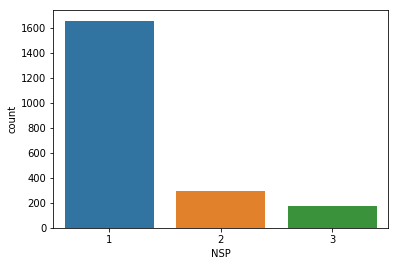

In [7]:
sns.countplot(x = 'NSP', data = data)  

## Next we will create a numpy array of the features and label.

In [8]:
Features = np.array(data[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']])
Labels =  np.array(data[['NSP']])   

## Now we will partition the dataset into training and test datasets

In [13]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 1701)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Standardize the dataset using the zscore standardization process

In [16]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## Next we define and train the KNN model.
## The KNN model is defined as having K = 3 i.e. three nearest neighbors.
## The model is trained using the fit method with the feature and label numpy arrays as arguments. 

In [17]:
KNN_mod = KNeighborsClassifier(n_neighbors = 3)
KNN_mod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## The predict method is used to compute KNN predictions from the model using the test features as an argument.

In [18]:
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test)

##  Next we evaluate the performance of the model.
##  We show the confusion matrix and the accuracy, precision, F1 and recall metrics.

In [19]:
# Evaluating the model results

def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Normal   Score Suspect    Score Pathologic')
    print('Actual Normal      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Suspect     %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Pathologic  %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Normal  Suspect  Pathologic')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Normal   Score Suspect    Score Pathologic
Actual Normal        1264               67                 4
Actual Suspect         78              143                 3
Actual Pathologic      24               27                91

Accuracy        0.88
 
          Normal  Suspect  Pathologic
Num case   1335.00     224.00      142.00
Precision   0.93      0.60       0.93
Recall      0.95      0.64       0.64
F1          0.94      0.62       0.76


## Another way of getting the model accuracy
## The predictions are scored as correct or not using a list comprehension. Accuracy is computed as the percentage of the test cases correctly classified.

In [20]:
num_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']
data_test = pd.DataFrame(X_test, columns = num_cols) 
data_test['predicted'] = KNN_mod.predict(X_test)
data_test['correct'] = [1 if x == z else 0 for x, z in zip(data_test['predicted'], y_test)] 
accuracy = 100.0*float(sum(data_test['correct']))/float(data_test.shape[0]) 
print(accuracy) 

88.06584362139918


'Done'

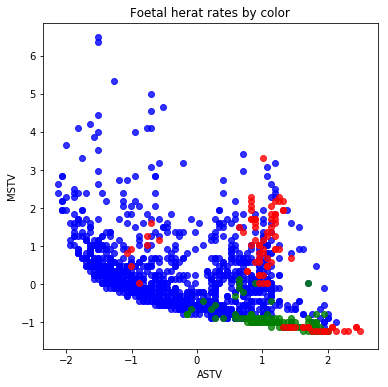

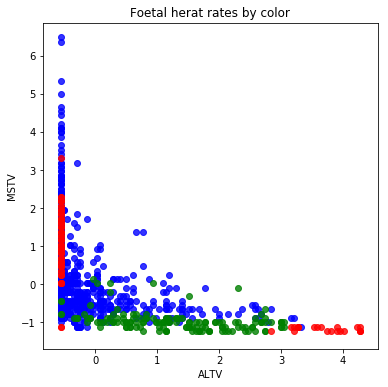

In [22]:
# Examine plots of the classifications of the heart rate categories
levels = {1:'Normal', 2:'Suspect', 3:'Pathologic'}
data_test['NSP'] = [levels[x] for x in data_test['predicted']]
markers = {2:'^', 1:'o'}
colors = {'Normal':'blue', 'Suspect':'green', 'Pathologic':'red'}
def plot_shapes(df, col1,col2,  markers, colors):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ax = plt.figure(figsize=(6, 6)).gca() # define plot axis
    for m in markers: # iterate over marker dictioary keys
        for c in colors: # iterate over color dictionary keys
            df_temp = df[(df['correct'] == m)  & (df['NSP'] == c)]
            sns.regplot(x = col1, y = col2, 
                        data = df_temp,  
                        fit_reg = False, 
                        scatter_kws={'color': colors[c]},
                        marker = markers[m],
                        ax = ax)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Foetal herat rates by color')
    return 'Done'
plot_shapes(data_test, 'ASTV', 'MSTV', markers, colors)
plot_shapes(data_test, 'ALTV', 'MSTV', markers, colors)

## Sensitivity analysis: we will try with k = 5 and k=1 next to see if prediction accuracy improves or not. 

In [23]:
## KNN model with k = 5.

KNN_mod = KNeighborsClassifier(n_neighbors = 5)
KNN_mod.fit(X_train, y_train)
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test)

def print_metrics_5(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Normal   Score Suspect    Score Pathologic')
    print('Actual Normal      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Suspect     %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Pathologic  %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Normal  Suspect  Pathologic')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_5(y_test, scores)

                 Confusion matrix
                 Score Normal   Score Suspect    Score Pathologic
Actual Normal        1283                0                52
Actual Suspect        214                0                10
Actual Pathologic      68                0                74

Accuracy        0.80
 
          Normal  Suspect  Pathologic
Num case   1335.00     224.00      142.00
Precision   0.82      0.00       0.54
Recall      0.96      0.00       0.52
F1          0.88      0.00       0.53


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
## KNN model with k = 1.

KNN_mod = KNeighborsClassifier(n_neighbors = 1)
KNN_mod.fit(X_train, y_train)
X_test = scale.transform(X_test)
scores = KNN_mod.predict(X_test)

def print_metrics_1(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Normal   Score Suspect    Score Pathologic')
    print('Actual Normal      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Suspect     %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Pathologic  %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Normal  Suspect  Pathologic')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_1(y_test, scores)

                 Confusion matrix
                 Score Normal   Score Suspect    Score Pathologic
Actual Normal        1144              139                52
Actual Suspect        123               91                10
Actual Pathologic      31               33                78

Accuracy        0.77
 
          Normal  Suspect  Pathologic
Num case   1335.00     224.00      142.00
Precision   0.88      0.35       0.56
Recall      0.86      0.41       0.55
F1          0.87      0.37       0.55


## Overall the sensitivity analysis reveals that k = 3 is the best KNN model.